<a href="https://colab.research.google.com/github/dsaint31x/SS/blob/master/SS_convolve_examples.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# (Discrete) Convolution 예제

* python을 활용하여 convolution의 동작을 확인.
* convolution의 수식과 실제 결과를 확인할 것.

In [ ]:
from scipy import fftpack
from scipy import signal

import numpy as np
import matplotlib.pyplot as plt

# NumPy를 활용한 결과

In [ ]:
# h = np.array([1/5,1/5,1/5,1/5,1/5])
h = np.ones(4)
h = 1/4 * h
x = np.array([1,0,1,0,1,0,1,0])
# x = np.array([2,1,0,1,2,1,0,1,2,1,0,1])
y_full  = np.convolve(x,h,mode='full') #, method='direct')
y_valid = np.convolve(x,h,mode='valid')#, method='direct')
y_same  = np.convolve(x,h,mode='same') #, method='direct')

print(f'len(h)={len(h)}, len(x)={len(x)}')
print(f'full mode : {len(y_full)}, valid mode : {len(y_valid)}, same mode : {len(y_same)}')
print(f'full : y={np.round(y_full,4)}')
print(f'valid: y={np.round(y_valid,4)}')
print(f'same : y={np.round(y_same,4)}')

len(h)=4, len(x)=8
full mode : 11, valid mode : 5, same mode : 8
full : y=[0.25 0.25 0.5  0.5  0.5  0.5  0.5  0.5  0.25 0.25 0.  ]
valid: y=[0.5 0.5 0.5 0.5 0.5]
same : y=[0.25 0.5  0.5  0.5  0.5  0.5  0.5  0.25]


# Scipy.signal을 활용한 결과

In [ ]:
# h = np.array([1/5,1/5,1/5,1/5,1/5])
h = np.ones(4)
h = 1/4 * h
x = np.array([1,0,1,0,1,0,1,0])
# x = np.array([2,1,0,1,2,1,0,1,2,1,0,1])
y_full  = signal.convolve(x,h,mode='full' , method='direct')
y_valid = signal.convolve(x,h,mode='valid', method='direct')
y_same  = signal.convolve(x,h,mode='same' , method='direct')

print(f'len(h)={len(h)}, len(x)={len(x)}')
print(f'full mode : {len(y_full)}, valid mode : {len(y_valid)}, same mode : {len(y_same)}')
print(f'full : y={np.round(y_full,4)}')
print(f'valid: y={np.round(y_valid,4)}')
print(f'same : y={np.round(y_same,4)}')

len(h)=4, len(x)=8
full mode : 11, valid mode : 5, same mode : 8
full : y=[0.25 0.25 0.5  0.5  0.5  0.5  0.5  0.5  0.25 0.25 0.  ]
valid: y=[0.5 0.5 0.5 0.5 0.5]
same : y=[0.25 0.5  0.5  0.5  0.5  0.5  0.5  0.25]


# Filter

위의 예제의 impulser response는 일종의 low pass filter로 동작한다.

LPF로 동작하는 system에서의 gain등을 확인하면 다음과 같음.
(일반화 처리는 안된 코드임.)

amplitude of high freq. comp.: 0.5
amplitude of DC comp.        : 0.5
amplitude of high freq. comp.: 0.0
amplitude of DC comp.        : 0.5
gain of high freq. comp. :0.0
gain of DC comp.         :1.0


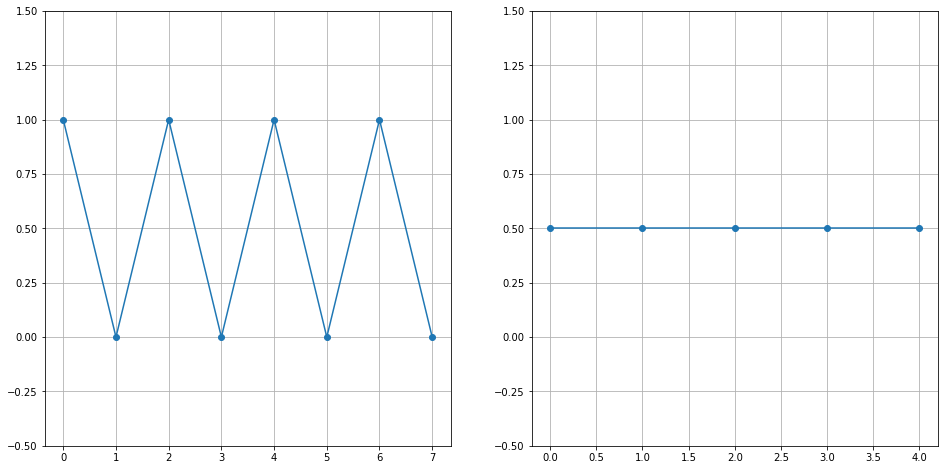

In [ ]:
_, axs = plt.subplots(1,2, figsize=(16,8))
for c,data in zip(axs, [x,y_valid]):
  c.grid('on')
  c.plot(data, marker='o')
  c.set_ylim([-.5,1.5])

print(f'amplitude of high freq. comp.: {np.round( (np.max(x)-np.min(x))/2 ,4)}')
print(f'amplitude of DC comp.        : {np.round( (np.max(x)+np.min(x))/2 ,4)}')

print(f'amplitude of high freq. comp.: {np.round( (np.max(y_valid)-np.min(y_valid))/2, 4)}')
print(f'amplitude of DC comp.        : {np.round( (np.max(y_valid)+np.min(y_valid))/2, 4)}')

print(f'gain of high freq. comp. :{np.round( (np.max(y_valid)-np.min(y_valid)) / (np.max(x)-np.min(x)), 4)}')
print(f'gain of DC comp.         :{np.round( (np.max(y_valid)+np.min(y_valid)) / (np.max(x)+np.min(x)), 4)}')

Transient response 부분을 확인할 수 있음.

* 해당 예에서는 조금 정도가 완화되어 보이나, impulse response와 input signal을 바꾸어보면 보다 확연하게 확인 가능함.

amplitude high freq.: 0.0
amplitude DC        : 0.5


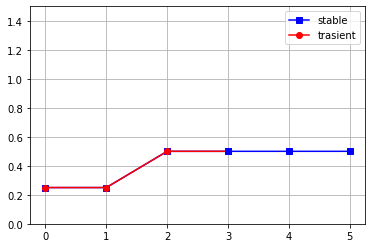

In [ ]:
f, ax = plt.subplots()

ax.plot(y_full[:len(y_full)-(len(h)+1)], marker='s', color='b', label='stable')
ax.plot(y_full[:len(h)], marker='o', color='r', label='transient')
ax.plot([3],[.5],marker='s', color='b')
ax.grid('on')
ax.set_ylim(0.,1.5)
ax.legend()
print(f'amplitude high freq.: {np.round( (np.max(y_valid)-np.min(y_valid))/2 ,4)}')
print(f'amplitude DC        : {np.round( (np.max(y_valid)+np.min(y_valid))/2 ,4)}')

# Homework : Fourier 변환

해당 system에 대한 Fourier Transform의 관점에서 확인할 수 있는 코드임.
* 해당 내용에 대한 분석을 수행할 것.


len of input signal :  8
[1 0 1 0 1 0 1 0]
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
8 (8,) (8,)
[ 0.  1.  2.  3. -4. -3. -2. -1.]
[4.+0.j 0.+0.j 0.+0.j 0.+0.j 4.+0.j 0.+0.j 0.+0.j 0.+0.j]
[4.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]


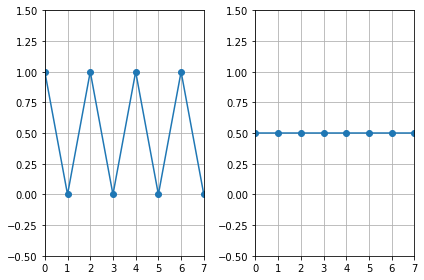

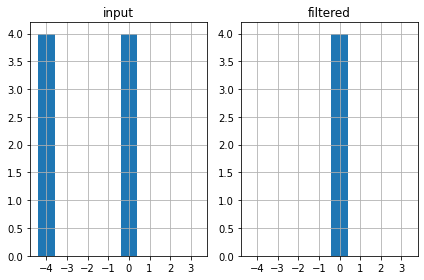

In [ ]:
# input
X = np.fft.fft(x)
print('len of input signal : ',len(x))
print(x)

# filtered
y = np.pad(y_valid,(0,len(x)-len(y_valid)),mode='symmetric')
Y = np.fft.fft(y)
print(y)

fig, axs = plt.subplots(1,2)
for c,data in zip(axs, [x,y]):
  c.grid('on')
  c.plot(data, marker='o')
  c.set_ylim([-.5,1.5])
  c.set_xlim([0,7])
  xticks= [i for i in range(len(x))]  
  c.set_xticks(xticks)

fig.tight_layout()
# DC ... High
freq = np.fft.fftfreq(len(X),1/len(X)) # n=window length, d=sample spacing

#--------------------------------
# fftshift
# -High, ... , DC, ... High-1
# X = np.fft.fftshift(X) 
# Y = np.fft.fftshift(Y)
# freq=np.fft.fftshift(np.fft.fftfreq(len(X), 1/8))

print(len(freq),X.shape,Y.shape)
fig,ax = plt.subplots(1,2)
ax[0].grid('on')
ax[1].grid('on')
ax[0].bar(freq,np.abs(X) , label='input')
ax[1].bar(freq,np.abs(Y) , label='filtered')
ax[0].set_title('input')
ax[1].set_title('filtered')
ax[0].set_xticks(freq)
ax[1].set_xticks(freq)
fig.tight_layout()
print(freq)
print(X)
print(Y)